In [ ]:
pip install imutils

In [ ]:
pip install scikit-image

In [1]:
from PIL import Image
import imutils
import numpy as np
import argparse
import cv2
import glob
import scipy
from numpy import asarray
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Data preprocessing 
- Grayscale, skin detector

In [107]:
#load images from oily_original folder
min_YCrCb = np.array([0,133,77],np.uint8)
max_YCrCb = np.array([235,173,127],np.uint8)


files = glob.glob('../data/old/normal_original/*.jpg')

i=0
for f in files:
    image = cv2.imread(f)
    #turn grayscale
    imageYCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
    #detect human skin
    skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)      

    skinYCrCb = cv2.bitwise_and(image, image, mask = skinRegionYCrCb)
        
        #write new images to folder
    cv2.imwrite('../data/old/normal/ycrcb%04i.jpg' %i, np.hstack([skinYCrCb]))    

    i +=1


In [99]:
#parameters
files = glob.glob('../data/old/normal/ycrcb*.jpg')    ##repeat and change to oily and normal
lst=[]
m=[]
r=[]

for f in files:
    image = cv2.imread(f,0)
    
    #count non-black pixels
    count = cv2.countNonZero(image)
    print(count)
    lst.append(count)
    #EDA: find mean and sd of those pixels and plot
    mean = sum(lst) / len(lst) 
    variance = sum([((x - mean) ** 2) for x in lst]) / len(lst) 
    res = variance ** 0.5
    print(mean)
    print(res)
    m.append(mean)
    r.append(res)
    
    #plot and check
#    hist = cv2.calcHist([image],[0],None,[256],[0,256])
#    plt.plot(hist)
#    plt.show()
    

59932
59932.0
0.0
19185
39558.5
20373.5
34716
37944.333333333336
16790.79319812564
12389
31555.5
18272.92057253027
34887
32221.8
16398.034143152647
1667943
304842.0
609781.0646808683
1021930
407283.14285714284
617801.8136396236
1602141
556640.375
700087.3341040991
47244
500040.77777777775
679185.0705232915
897
450126.4
661502.9327221762
651572
468439.63636363635
633371.39104037
31788
432052.0
618299.3098983965
36890
401654.92307692306
603303.0668413885
1620903
488744.0714285714
660738.3463333667
48741
459410.5333333333
647700.9664149928
47547
433669.0625
635008.7462676665
22799
409500.23529411765
623588.3675337092
667846
423852.77777777775
608901.3923851852
26542
402941.6842105263
599264.6350216109
649099
415249.55
586549.5591113742
1152822
450372.04761904763
593573.3371568918
879735
469888.54545454547
586781.9914972857
28243
450686.5652173913
580908.5328280345
22449
432843.3333333333
575079.8825261631
22070
416412.4
569181.5265095662
905596
435227.1538461539
566001.0525433059
467520
4

511900
466778.603960396
633051.1299029078
15967
464557.85714285716
632278.2484548844
41734
462485.1911764706
631417.5915591525
35112
460400.44390243903
630579.0779029616
1648256
466166.73300970875
634441.486161855
21410
464018.1497584541
633657.9977279932
1318524
468126.35096153844
634890.2789430859
16679
465966.3157894737
634135.24042529
26489
463873.56666666665
633346.6242471983
38865
461859.30805687205
632517.8938633379
175925
460510.5613207547
631328.4053069499
14269
458415.5305164319
630582.9122897012
493354
458578.79439252336
629112.3748752987
29308
456582.18604651163
628326.8505698567
44617
454674.93981481483
627494.1909576117
14613
452647.0046082949
626755.7362563097
36325
450737.2706422018
625949.0641304414
315744
450120.8630136986
624584.6338684193
43525
448272.7
623763.4132123854
29802
446379.16742081445
622983.9897733432
1569362
451437.64864864864
626111.6608789357
1487178
456082.2242152466
628527.5616046197
36578
454209.4375
627746.3087041889
18051
452270.9555555555
627021

865333
422557.9888143177
599237.9086312937
1571504
425122.6004464286
601019.6026787664
651483
425626.7438752784
600444.7665713892
897
424682.9
600110.5889295153
429872
424694.40576496674
599444.9583376212
6545
423769.296460177
599103.70459429
7894
422851.2494481236
598760.2772845819
1757994
425792.0925110132
601366.766844432
26840
424915.2747252747
600996.0151192691
892109
425939.82236842107
600734.3221169583
14028
425038.4835886214
600385.3012094441
30236
424176.4694323144
600012.5466370787
29571
423316.7625272331
599640.9054970363
295445
423038.7804347826
599018.3737780228
478776
423159.6854663774
598373.945348612
42768
422336.3268398268
597987.3713922619
7364
421440.0583153348
597651.8128917161
1729673
424259.525862069
600082.0438267593
1087458
425685.75913978496
600223.2048385148
708680
426293.0429184549
599721.8334968311
37320
425460.12419700215
599349.1498396558
8652
424569.50854700856
599017.7486752197
39991
423749.5117270789
598641.6829244809
1200565
425402.3106382979
599074.75

815860
424731.49413489737
601860.1129783519
745133
425200.60322108347
601544.1124348366
562072
425400.70760233916
601126.9745111794
1372372
426783.1474452555
601775.1537147921
1965882
429026.73177842563
604196.581313388
3405
428407.19505094615
603974.7014275684
621600
428687.99854651163
603580.4825651407
961470
429461.26705370104
603483.2504638857
38974
428895.34347826085
603228.7167649296
31425
428320.13314037625
602981.4066061527
1606109
430022.1401734104
604204.3285937472
13902
429421.6782106782
603974.824147298
1601096
431109.969740634
605173.7255202875
547435
431277.34388489206
604754.2663523182
47547
430726.007183908
604494.4271497722
23046
430141.10043041606
604257.6925205122
851919
430745.36676217767
604035.3921069476
32191
430175.1888412017
603791.109778436
237639
429900.13714285713
603403.4974277075
50140
429358.39657631953
603143.2863425023
21410
428777.2735042735
602909.8992844347
119400
428337.1920341394
602593.7553563163
8780
427741.23011363635
602372.9115483813
23465
427

In [103]:
count ** 0.80

72293.84393994849

In [91]:
oily_mean

957655.0529840069

In [104]:
src = '../data/old/normal/'    ##repeat and change to oily and normal
files = os.listdir(src) 

for image_file_name in os.listdir(src):
    img = cv2.imread(src + image_file_name, 0)
    count = cv2.countNonZero(img)
    
    #remove pictures which has > 80% dark pixel (dry: 86018; oily: 1830)
    if count < 72293:      ##adjust for oily and normal (oily: count<4813; normal: count<14166)
        os.remove(src + image_file_name)
        


<Figure size 432x288 with 0 Axes>

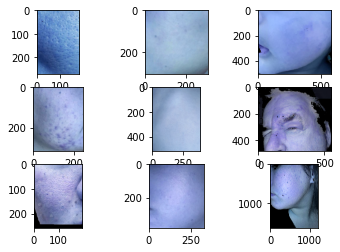

In [120]:
f = plt.figure()
#imgLr = '../data/test/normal970.png'
#imgRr = '../data/test/normal829669.png'
img = cv2.imread('../data/old/oily/ycrcb0008.jpg')
img2 = cv2.imread('../data/old/normal/ycrcb0049.jpg')
img3 = cv2.imread('../data/old/dry/ycrcb0068.jpg')
img4 = cv2.imread('../data/old/oily/ycrcb0053.jpg')
img5 = cv2.imread('../data/old/normal/ycrcb0072.jpg')
img6 = cv2.imread('../data/old/dry/ycrcb0118.jpg')
img7 = cv2.imread('../data/old/oily/ycrcb0022.jpg')
img8 = cv2.imread('../data/old/normal/ycrcb0199.jpg')
img9 = cv2.imread('../data/old/dry/ycrcb0146.jpg')



f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(img)
axarr[0,1].imshow(img2)
axarr[0,2].imshow(img3)
axarr[1,0].imshow(img4)
axarr[1,1].imshow(img5)
axarr[1,2].imshow(img6)
axarr[2,0].imshow(img7)
axarr[2,1].imshow(img8)
axarr[2,2].imshow(img9)


plt.show()

# Contouring test

no. of shapes 54


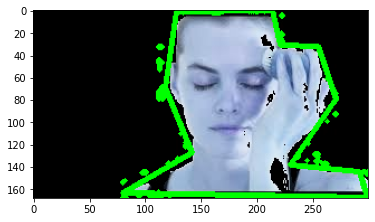

In [5]:
#approximation
img = cv2.imread('../data/images/dry/ycrcb0020.jpg')

image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  

#find contours

contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Print the number of shapes found

print("no. of shapes {0}".format(len(contours)))

for cnt in contours:
    epsilon = 0.01* cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    img = cv2.drawContours(img, [approx], 0, (0,255,0),3)

plt.imshow(img)
plt.show()



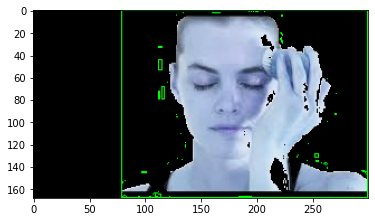

True

In [33]:
#bounding box
img = cv2.imread('../data/images/dry/ycrcb0020.jpg')

image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#find contours
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Print the number of shapes found
#print("no. of shapes {0}".format(len(contours)))

#draw these contours
for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(img, [box], 0, (0,255,0),1)
    
plt.imshow(img)
plt.show()

cv2.imwrite('../data/images/dry/new.png',img)

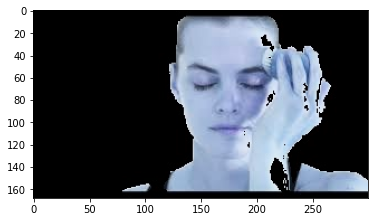

True

In [114]:
#bounding box
img = cv2.imread('../data/images/dry/ycrcb0020.jpg')

image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#find contours
#contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Print the number of shapes found
#print("no. of shapes {0}".format(len(contours)))

thresh=cv2.threshold(image, 10, 255, cv2.THRESH_BINARY )[1] # threshold level is ~10
    
plt.imshow(img)
plt.show()

cv2.imwrite('../data/images/dry/new.png',img)

# This doesn't contour all images:

In [13]:
files = glob.glob('..data/images/dry/ycrcb*.jpg')

i=0
for f in files:
    img = cv2.imread(f)
    image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
    #find contours

    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #draw these contours
    for cnt in contours:
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
            
        img = cv2.drawContours(img, [box], 0, (0,255,0),1)
        cv2.imwrite('../data/images/dry/new%04i.jpg' %i,img)
        i+=1

In [140]:
files = glob.glob('../data/images/normal/ycrcb*.jpg')
i=0
for f in files:
    print(f)
    img = cv2.imread(f)
    image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
    #find contours

    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #draw these contours
    for cnt in contours:
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        
    # save
    img = cv2.drawContours(img, [box], 0, (0,0,0),1)
    cv2.imwrite('../data/images/normal/crop%04i.jpg' %i,img)
    i+=1

../data/images/normal/ycrcb0051.jpg
../data/images/normal/ycrcb0079.jpg
../data/images/normal/ycrcb0092.jpg
../data/images/normal/ycrcb0086.jpg
../data/images/normal/ycrcb0253.jpg
../data/images/normal/ycrcb0247.jpg
../data/images/normal/ycrcb0125.jpg
../data/images/normal/ycrcb0131.jpg
../data/images/normal/ycrcb0119.jpg
../data/images/normal/ycrcb0118.jpg
../data/images/normal/ycrcb0124.jpg
../data/images/normal/ycrcb0246.jpg
../data/images/normal/ycrcb0252.jpg
../data/images/normal/ycrcb0087.jpg
../data/images/normal/ycrcb0093.jpg
../data/images/normal/ycrcb0078.jpg
../data/images/normal/ycrcb0044.jpg
../data/images/normal/ycrcb0050.jpg
../data/images/normal/ycrcb0052.jpg
../data/images/normal/ycrcb0085.jpg
../data/images/normal/ycrcb0091.jpg
../data/images/normal/ycrcb0244.jpg
../data/images/normal/ycrcb0126.jpg
../data/images/normal/ycrcb0127.jpg
../data/images/normal/ycrcb0133.jpg
../data/images/normal/ycrcb0245.jpg
../data/images/normal/ycrcb0090.jpg
../data/images/normal/ycrcb0

In [203]:
files = glob.glob('../data/images/dry/new*.jpg')
i=0
for f in files:
    img = cv2.imread(f)
   # img = io.imread(f)
    image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
    #find contours


    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #draw these contours
    for cnt in contours:
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
            
    img = cv2.drawContours(img, [box], 0, (0,0,0),1)
    x, y, w, h = cv2.boundingRect(box)
    crop = img[y:y+h, x:x+w] # create a cropped region of the gray image
    if crop !=[]:
#        cv2.imwrite('../data/images/dry/c%04i.jpg' %i, crop)
        i+=1

<ipython-input-203-416984a93500>:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if crop !=[]:


In [194]:
h

237

In [168]:
files = glob.glob('../data/images/dry/new*.jpg')
i=0
for f in files:
    print(f)

../data/images/dry/new0026.jpg
../data/images/dry/new0032.jpg
../data/images/dry/new0152.jpg
../data/images/dry/new0146.jpg
../data/images/dry/new0147.jpg
../data/images/dry/new0153.jpg
../data/images/dry/new0033.jpg
../data/images/dry/new0027.jpg
../data/images/dry/new0031.jpg
../data/images/dry/new0025.jpg
../data/images/dry/new0019.jpg
../data/images/dry/new0145.jpg
../data/images/dry/new0151.jpg
../data/images/dry/new0179.jpg
../data/images/dry/new0178.jpg
../data/images/dry/new0150.jpg
../data/images/dry/new0144.jpg
../data/images/dry/new0018.jpg
../data/images/dry/new0024.jpg
../data/images/dry/new0030.jpg
../data/images/dry/new0008.jpg
../data/images/dry/new0034.jpg
../data/images/dry/new0020.jpg
../data/images/dry/new0168.jpg
../data/images/dry/new0140.jpg
../data/images/dry/new0154.jpg
../data/images/dry/new0155.jpg
../data/images/dry/new0141.jpg
../data/images/dry/new0169.jpg
../data/images/dry/new0021.jpg
../data/images/dry/new0035.jpg
../data/images/dry/new0009.jpg
../data/

# Cropping. Both methods work

no. of shapes 54


<ipython-input-199-bfdd30cb2a9e>:19: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if crop !=[]:


True

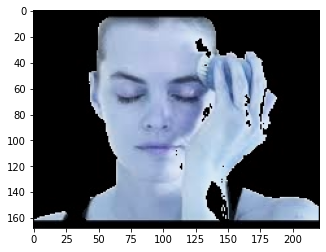

In [199]:
img = cv2.imread('../data/images/dry/ycrcb0020.jpg')

image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
#find contours

contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Print the number of shapes found

print("no. of shapes {0}".format(len(contours)))

#draw these contours
for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(img, [box], 0, (0,0,0),1)
    x, y, w, h = cv2.boundingRect(box) # create a rectangle around those points
    if crop !=[]:
        crop = img[y:y+h, x:x+w] # create a cropped region of the gray image
    
plt.imshow(crop)
cv2.imwrite('../data/images/dry/new0020.png',crop)

True

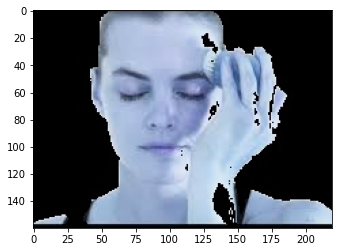

In [115]:
img = cv2.imread('../data/images/dry/ycrcb0020.jpg')

image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  

#Print the number of shapes found
#print("no. of shapes {0}".format(len(contours)))

thresh=cv2.threshold(image, 10, 255, cv2.THRESH_BINARY )[1] # threshold level is ~10
x, y, w, h = cv2.boundingRect(thresh)
crop = img[y:y+h, x:x+w]

plt.imshow(crop)
cv2.imwrite('../data/images/dry/new0020_2.png',crop)

# But again cannot crop all images in folder

In [130]:
files = glob.glob('../data/old/normal/ycrcb*.jpg')

i=0
for f in files:
    img = cv2.imread(f)
    image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
    #find contours

    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #draw these contours
    for cnt in contours:
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
            
    img = cv2.drawContours(img, [box], 0, (0,0,0),1)
    x, y, w, h = cv2.boundingRect(box)
    crop = img[y:y+h, x:x+w]
    if crop !=[]:
        cv2.imwrite('../data/old/oily/cnormal%04i.jpg' %i, crop)
        i+=1

<ipython-input-130-53c326c3ce6f>:20: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if crop !=[]:


error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [164]:
files = glob.glob('..data/images/dry/new*.jpg')

i=0
for f in files:
    img = cv2.imread(f)
    image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

    thresh=cv2.threshold(image, 10, 255, cv2.THRESH_BINARY )[1] # threshold level is ~10
    x, y, w, h = cv2.boundingRect(thresh)
    crop = img[y:y+h, x:x+w]

    cv2.imwrite('../data/images/dry/crop%04i.jpg' %i, crop)
    i+=1

# Greyscale

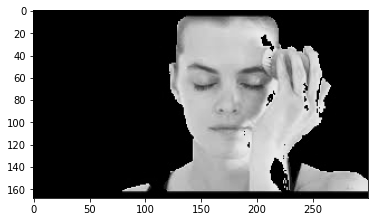

In [95]:
img = cv2.imread('../data/images/dry/ycrcb0020.jpg')
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
plt.imshow(image, cmap="gray", vmin=0, vmax=255) 


#######another way to turn greyscale
#rgb_weights = [0.2989, 0.5870, 0.1140]
#grayscale_image = np.dot(an_image[...,:3], rgb_weights)
#plt.imshow(grayscale_image, cmap="gray", vmin=0, vmax=255)

# Turn greyscale

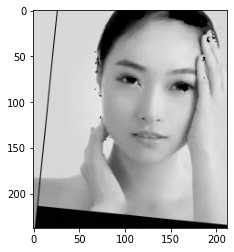

In [136]:
files = glob.glob('../data/old/aug_normal/*.png')
i=0
for f in files:
    img = cv2.imread(f)
    #turn greyscale
    image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(image, cmap="gray", vmin=0, vmax=255) 
    #write new images to folder
    cv2.imwrite('../data/old/aug_normal/og_%04i.jpg' %i, image)
    i +=1

In [282]:
print(image.shape)

(238, 212)


# Add dimension

In [271]:
#print(grayscale_batch.shape)  # (64, 224, 224)
rgb_batch = np.repeat(image[..., np.newaxis], 3, -1)
print(rgb_batch.shape)  # (64, 224, 224, 3)

(108, 81, 3)


# Overall color distribution??

# Histogram

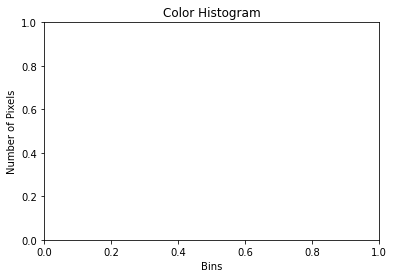

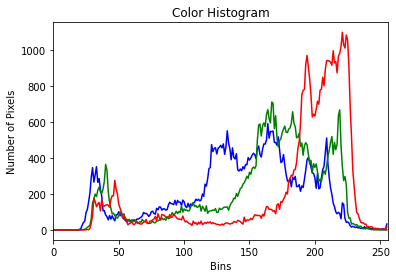

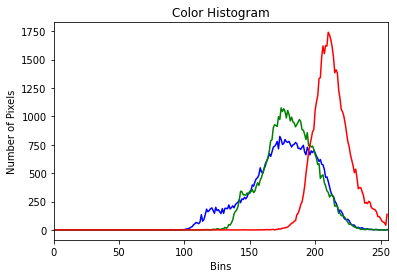

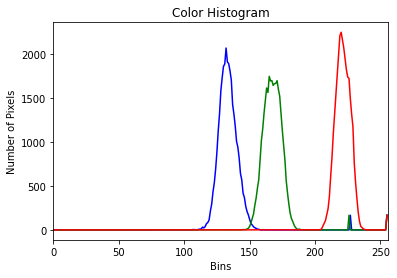

In [119]:
images = []
path = "../data/test/dry_test/"
for image in os.listdir(path):
    images.append(image)

for image in images:
     img = cv2.imread("%s%s"%(path, image))    # Load the image 
     channels = cv2.split(img)       # Set the image channels
     colors = ("b", "g", "r")        # Initialize tuple 
     plt.figure()    
     plt.title("Color Histogram")
     plt.xlabel("Bins")
     plt.ylabel("Number of Pixels")

     for (i, col) in zip(channels, colors):       # Loop over the image channels
          hist = cv2.calcHist([i], [0], None, [256], [0, 256])   # Create a histogram for current channel
          plt.plot(hist, color = col)      # Plot the histogram
          plt.xlim([0, 256])

In [168]:
  # grab all images in the folder
files = glob.glob('../data/old/dry/*.jpg')
imgs=[]
for f in files:
    image = cv2.imread(f)

    #resize here?
#    image = cv2.resize(image, (64,64))
 
    #turn to numpy array
    image = np.asarray(image)
    imgs.append(image)
    imgs+=image


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [21]:
filelist = glob.glob('../data/old/dry/*.jpg')
#x = np.array([np.array(Image.open(fname)) for fname in filelist])

x = [np.array(Image.open(fname)).flatten() for fname in filelist]
x = np.hstack(x)
print(x.shape)

(1073281397,)


In [22]:
x_new = x[x>5]

(array([ 2924813.,  9733328., 14834101., 19684647., 23340958., 25869987.,
        29633553., 34344622., 38336635., 41338121., 44735882., 46978009.,
        48940457., 50509273., 51669185., 50076211., 47333032., 43630633.,
        39613265., 34324749., 29551274., 25092562., 19141750., 13003499.,
        10154571.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]),
 <a list of 25 Patch objects>)

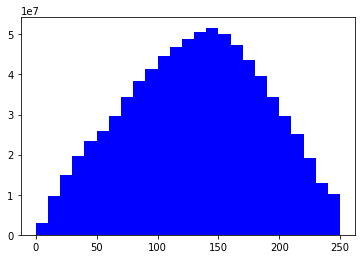

In [25]:
plt.hist(x_new, color='b', bins=[0, 10, 20, 30, 40, 50, 60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250])

In [19]:
filelist = glob.glob('../data/old/oily/*.jpg')
z = [np.array(Image.open(fname)).flatten() for fname in filelist]
z = np.hstack(z)
print(z.shape)

(1685211528,)


(array([ 3330036., 10027997., 15194394., 19956135., 24855296., 30473174.,
        35783524., 39660646., 44934473., 49898398., 55404674., 60805512.,
        66481630., 69678688., 68440988., 63793789., 57168207., 52806894.,
        47091434., 39225675., 32622678., 26978284., 22373046., 16080585.,
        13013076.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]),
 <a list of 25 Patch objects>)

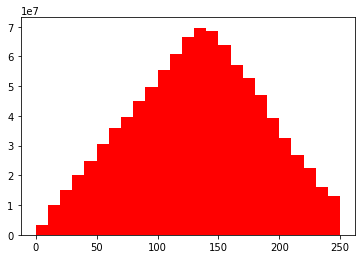

In [20]:
z_new = z[z>5]
plt.hist(z_new, color='r', bins=[0, 10, 20, 30, 40, 50, 60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250])

In [17]:
filelist = glob.glob('../data/old/normal/*.jpg')
y = [np.array(Image.open(fname)).flatten() for fname in filelist]
y = np.hstack(y)
print(y.shape)

(1685211528,)


(array([ 6604156., 19896416., 27960099., 34240998., 38567404., 41665537.,
        43687478., 44253162., 46166816., 49300965., 52768575., 56498924.,
        59723998., 61592582., 63227741., 62647568., 61285207., 60446266.,
        54836408., 47824074., 40181592., 34587189., 29501459., 20393410.,
        14625511.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]),
 <a list of 25 Patch objects>)

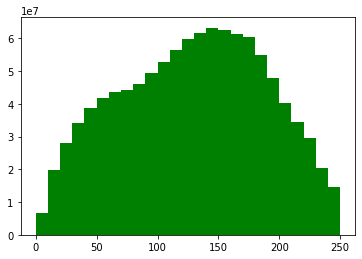

In [18]:
y_new = y[y>5]
plt.hist(y_new, color = 'g', bins=[0, 10, 20, 30, 40, 50, 60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250])

In [6]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

Using TensorFlow backend.


# Basic CNN

In [7]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [179]:
dir = '/Users/ChristieFung/Desktop/Insight/skin_care_scraper-2/data/old/train'
val_dir = '/Users/ChristieFung/Desktop/Insight/skin_care_scraper-2/data/old/validate'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1001 images belonging to 3 classes.
Found 334 images belonging to 3 classes.


In [164]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


dir = '/Users/ChristieFung/Desktop/Insight/skin_care_scraper-2/data/old/train'
val_dir = '/Users/ChristieFung/Desktop/Insight/skin_care_scraper-2/data/old/validate'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



cnn.fit(x = training_set, validation_data = val_set, epochs = 25)
cnn.save('cnn_model.h5')

Found 1001 images belonging to 3 classes.
Found 334 images belonging to 3 classes.
Epoch 1/25
32/32 [==============================] - 46s 1s/step - loss: 1.9247 - accuracy: 0.4446 - val_loss: 1.2321 - val_accuracy: 0.4850
Epoch 2/25
32/32 [==============================] - 55s 2s/step - loss: 0.9205 - accuracy: 0.5215 - val_loss: 1.1134 - val_accuracy: 0.3802
Epoch 3/25
32/32 [==============================] - 54s 2s/step - loss: 0.8980 - accuracy: 0.5734 - val_loss: 1.0975 - val_accuracy: 0.3982
Epoch 4/25
32/32 [==============================] - 70s 2s/step - loss: 0.8616 - accuracy: 0.5974 - val_loss: 1.1191 - val_accuracy: 0.4192
Epoch 5/25
32/32 [==============================] - 53s 2s/step - loss: 0.8151 - accuracy: 0.6284 - val_loss: 1.2061 - val_accuracy: 0.4222
Epoch 6/25
32/32 [==============================] - 51s 2s/step - loss: 0.7833 - accuracy: 0.6533 - val_loss: 1.2553 - val_accuracy: 0.4251
Epoch 7/25
32/32 [==============================] - 52s 2s/step - loss: 0.741

In [166]:
model = tf.keras.models.load_model('cnn_model.h5')


In [167]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [174]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

img_path = '/Users/ChristieFung/Desktop/Insight/skin_care_scraper-2/data/dry_test/oily_faceimage11.jpg'
#image = load_img(img_path, target_size=(224, 224))


min_YCrCb = np.array([0,133,77],np.uint8)
max_YCrCb = np.array([235,173,127],np.uint8)


image = cv2.imread(img_path)

image = cv2.resize(image, (224,224))

imageYCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
#detect human skin
skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)      

image = cv2.bitwise_and(image, image, mask = skinRegionYCrCb)

#img /= 255.
img = img_to_array(image)
img = np.expand_dims(img, axis=0)
images = np.vstack([img])
#preds = model.predict(img)

# predicting multiple images at once
#img = image.load_img('test2.jpg', target_size=(img_width, img_height))
#y = image.img_to_array(img)
#y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
#images = np.vstack([x, y])
#classes = model.predict_classes(images, batch_size=10)

# print the classes, the images belong to
#print classes
#print classes[0]
#print classes[0][0]

classes = model.predict(images, batch_size=10)
classes = np.argmax(classes,axis=1)
print("Predicted class is:",classes)

if classes == 0:
    print("Label: Normal")
elif classes == 1:
    print("Label: Dry")
elif classes == 2:
    print("Label: Dry")


Predicted class is: [2]
Label: Dry


# Data Augmentation

In [8]:
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
height_shift_range=0.1,shear_range=0.15, 
zoom_range=0.1,channel_shift_range = 10, horizontal_flip=True)

In [46]:
import imageio
image_path = '/Users/ChristieFung/Desktop/Insight/skin_care_scraper-2/data/old/oily_original/oily_faceimage5.jpg' 
image = np.expand_dims(imageio.imread(image_path), 0)

In [47]:
save_here = '/Users/ChristieFung/Desktop/Insight/skin_care_scraper-2/data/old/aug_oily/'
datagen.fit(image)
for x, val in zip(datagen.flow(image,                    #image we chose
        save_to_dir=save_here,     #this is where we figure out where to save
         save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
        save_format='png'),range(10)) :     # here we define a range because we want 10 augmented images otherwise it will keep looping forever I think
    pass

# Keras CNN

In [180]:
cnn = tf.keras.models.Sequential()

In [181]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224,3]))

In [182]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [183]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [184]:
cnn.add(tf.keras.layers.Flatten())

In [185]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [186]:
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [187]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [189]:
cnn_model = cnn.fit(x = training_set, validation_data = val_set, epochs = 25)

Epoch 1/25
32/32 [==============================] - 47s 1s/step - loss: 0.5662 - accuracy: 0.7502 - val_loss: 1.3853 - val_accuracy: 0.4671
Epoch 2/25
32/32 [==============================] - 45s 1s/step - loss: 0.5543 - accuracy: 0.7692 - val_loss: 1.4658 - val_accuracy: 0.4701
Epoch 3/25
32/32 [==============================] - 44s 1s/step - loss: 0.5378 - accuracy: 0.7772 - val_loss: 1.3390 - val_accuracy: 0.4551
Epoch 4/25
32/32 [==============================] - 49s 2s/step - loss: 0.5153 - accuracy: 0.7852 - val_loss: 1.4705 - val_accuracy: 0.4850
Epoch 5/25
32/32 [==============================] - 52s 2s/step - loss: 0.5206 - accuracy: 0.7852 - val_loss: 1.4685 - val_accuracy: 0.4760
Epoch 6/25
32/32 [==============================] - 56s 2s/step - loss: 0.4898 - accuracy: 0.7922 - val_loss: 1.7862 - val_accuracy: 0.4461
Epoch 7/25
32/32 [==============================] - 56s 2s/step - loss: 0.4884 - accuracy: 0.8052 - val_loss: 1.6337 - val_accuracy: 0.4611
Epoch 8/25
32/32 [==

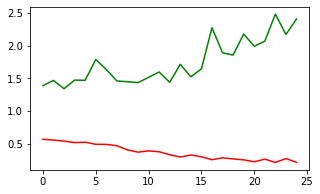

In [190]:
plt.figure(figsize=(5,3))
plt.plot(cnn_model.epoch, cnn_model.history['loss'], label='training', color='red')
plt.plot(cnn_model.epoch, cnn_model.history['val_loss'], label='validation', color='green')

(0.0, 20.0)

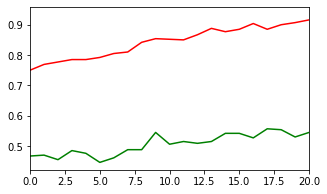

In [191]:
plt.figure(figsize=(5,3))
plt.plot(cnn_model.epoch,cnn_model.history['accuracy'], label='training', color='red')
plt.plot(cnn_model.epoch,cnn_model.history['val_accuracy'], label='validation', color='green')
plt.xlim(0,20)

# ResNet

In [72]:
from keras.applications.resnet50 import ResNet50
# load model
input_shape = [224,224]
model = ResNet50(input_shape=input_shape + [3], weights='imagenet', include_top=False) #do not include last pooling layer


In [27]:
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

In [75]:
for layers in model.layers:
    layers.trainable = False

# Flatten the output to 1 dimension
x = keras.layers.Flatten()(model.output)

# add new classifier layers
x = keras.layers.Dense(1024,activation='relu')(x)

x = keras.layers.Dropout(0.7)(x) 

x = keras.layers.Dense(3,activation='softmax')(x)

#create model object
model = keras.Model(model.input,x)

# summarize the model
model.summary()
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [29]:
dir = '/Users/ChristieFung/Desktop/Insight/skin_care_scraper-2/data/old/train'
val_dir = '/Users/ChristieFung/Desktop/Insight/skin_care_scraper-2/data/old/validate'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1001 images belonging to 3 classes.
Found 334 images belonging to 3 classes.


In [ ]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=5)

model.save('model.h5')

In [76]:
rnmodel.save_weights('model_weights.h5')

In [77]:
# Save the model architecture
with open('model_architecture.json', 'w') as f:
    f.write(rnmodel.to_json())

In [30]:
#checkpointer???

model = model.fit(training_set, validation_data=val_set, epochs=20)


Epoch 1/20
32/32 [==============================] - 245s 8s/step - loss: 27.2423 - accuracy: 0.6244 - val_loss: 29.7311 - val_accuracy: 0.4850
Epoch 2/20
32/32 [==============================] - 266s 8s/step - loss: 12.0014 - accuracy: 0.7692 - val_loss: 27.8875 - val_accuracy: 0.4850
Epoch 3/20
32/32 [==============================] - 299s 9s/step - loss: 5.4247 - accuracy: 0.7822 - val_loss: 12.0807 - val_accuracy: 0.4850
Epoch 4/20
32/32 [==============================] - 308s 10s/step - loss: 2.9991 - accuracy: 0.8192 - val_loss: 8.6247 - val_accuracy: 0.4850
Epoch 5/20
32/32 [==============================] - 322s 10s/step - loss: 1.4984 - accuracy: 0.8581 - val_loss: 6.4656 - val_accuracy: 0.4850
Epoch 6/20
32/32 [==============================] - 285s 9s/step - loss: 0.9021 - accuracy: 0.8691 - val_loss: 13.4414 - val_accuracy: 0.4850
Epoch 7/20
32/32 [==============================] - 253s 8s/step - loss: 0.9536 - accuracy: 0.8551 - val_loss: 8.5682 - val_accuracy: 0.4850
Epoch

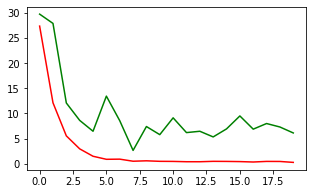

In [31]:
plt.figure(figsize=(5,3))
plt.plot(model.epoch, model.history['loss'], label='training', color='red')
plt.plot(model.epoch, model.history['val_loss'], label='validation', color='green')

(0.0, 20.0)

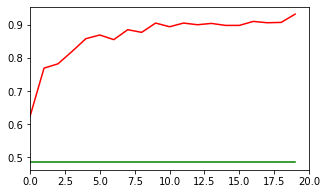

In [32]:
plt.figure(figsize=(5,3))
plt.plot(model.epoch,model.history['accuracy'], label='training', color='red')
plt.plot(model.epoch,model.history['val_accuracy'], label='validation', color='green')
plt.xlim(0,20)

In [1]:
pip install densenet_pytorch

     |████████████████████████████████| 80.6 MB 1.6 kB/s eta 0:00:011     |████████████▉                   | 32.3 MB 7.4 MB/s eta 0:00:07     |██████████████████████▌         | 56.6 MB 10.1 MB/s eta 0:00:03
     |████████████████████████████████| 829 kB 5.7 MB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=efb804d290d7594cb2d9086aa995511d790245f49fbaa16a645d329f7f45aff0
  Stored in directory: /Users/ChristieFung/Library/Caches/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install torchvision

     |████████████████████████████████| 436 kB 4.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# DenseNet

In [18]:
from tensorflow.keras.applications import DenseNet121
d_model = DenseNet121(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 

29089792/29084464 [==============================] - 4s 0us/step


In [28]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Flatten,MaxPooling2D,Dropout

In [43]:
ResNet50(input_shape=input_shape + [3], weights='imagenet', include_top=False)


for layers in model.layers:
    layers.trainable = False

# Flatten the output to 1 dimension
x = keras.layers.Flatten()(model.output)

# add new classifier layers
x = keras.layers.Dense(1024,activation='relu')(x)

x = keras.layers.Dropout(0.7)(x) 

x = keras.layers.Dense(3,activation='softmax')(x)

#create model object
model = keras.Model(model.input,x)

# summarize the model
model.summary()

model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])












for layers in d_model.layers:
    layers.trainable = False

# Flatten the output to 1 dimension
#x = keras.layers.Flatten()(d_model.output)

x = d_model.output

x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024,activation='relu')(x) 
x = Dense(512,activation='relu')(x) 
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(3,activation='softmax')(x) #FC-layer

In [44]:
dir = '/Users/ChristieFung/Desktop/Insight/skin_care_scraper-2/data/images/train'
val_dir = '/Users/ChristieFung/Desktop/Insight/skin_care_scraper-2/data/images/validate'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 591 images belonging to 3 classes.
Found 181 images belonging to 3 classes.


In [45]:
d_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
d_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [47]:
# Fits-the-model
d_model = d_model.fit(training_set, validation_data=val_set,batch_size=32,steps_per_epoch=training_set.samples //32, validation_steps=val_set.samples//32, epochs=20, verbose=1)

Epoch 1/20


ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:532 train_step  **
        loss = self.compiled_loss(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:205 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:143 __call__
        losses = self.call(y_true, y_pred)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:246 call
        return self.fn(y_true, y_pred, **self._fn_kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1527 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4561 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1117 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, None) and (None, 7, 7, 1024) are incompatible


In [ ]:
#build dense block with 5 layers
class Dense_Block(nn.Module):
    def __init__(self, in_channels):
        super(Dense_Block, self).__init__()

        self.relu = nn.ReLU(inplace = True)
        self.bn = nn.BatchNorm2d(num_features = in_channels)

        self.conv1 = nn.Conv2d(in_channels = in_channels, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.conv4 = nn.Conv2d(in_channels = 96, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.conv5 = nn.Conv2d(in_channels = 128, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        
    def forward(self, x):

        bn = self.bn(x)
        conv1 = self.relu(self.conv1(bn))

        conv2 = self.relu(self.conv2(conv1))
        c2_dense = self.relu(torch.cat([conv1, conv2], 1))

        conv3 = self.relu(self.conv3(c2_dense))
        c3_dense = self.relu(torch.cat([conv1, conv2, conv3], 1))

        conv4 = self.relu(self.conv4(c3_dense))
        c4_dense = self.relu(torch.cat([conv1, conv2, conv3, conv4], 1))

        conv5 = self.relu(self.conv5(c4_dense))
        c5_dense = self.relu(torch.cat([conv1, conv2, conv3, conv4, conv5], 1))

        return c5_dense

In [ ]:
#Transition layer
class Transition_Layer(nn.Module): 
    def __init__(self, in_channels, out_channels):
        super(Transition_Layer, self).__init__() 
    
        self.relu = nn.ReLU(inplace = True) 
        self.bn = nn.BatchNorm2d(num_features = out_channels) 
        self.conv = nn.Conv2d(in_channels = in_channels, out_channels = out_channels, kernel_size = 1, bias = False) 
        self.avg_pool = nn.AvgPool2d(kernel_size = 2, stride = 2, padding = 0) 
    def forward(self, x): 
        bn = self.bn(self.relu(self.conv(x))) 
        out = self.avg_pool(bn) 
        return out 

In [ ]:
class DenseNet(nn.Module): 
    def __init__(self, nr_classes): 
        super(DenseNet, self).__init__() 
  
        self.lowconv = nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 7, padding = 3, bias = False) 
        self.relu = nn.ReLU()
    
    # Make 3 Dense Blocks 
        self.denseblock1 = self._make_dense_block(Dense_Block, 64) 
        self.denseblock2 = self._make_dense_block(Dense_Block, 128)
        self.denseblock3 = self._make_dense_block(Dense_Block, 128)
    # Make 3 transition Layers 
        self.transitionLayer1 = self._make_transition_layer(Transition_Layer, in_channels = 160, out_channels = 128) 
        self.transitionLayer2 = self._make_transition_layer(Transition_Layer, in_channels = 160, out_channels = 128) 
        self.transitionLayer3 = self._make_transition_layer(Transition_Layer, in_channels = 160, out_channels = 64)
        
        # Classifier 
        self.bn = nn.BatchNorm2d(num_features = 64) 
        self.pre_classifier = nn.Linear(64*4*4, 512) 
        self.classifier = nn.Linear(512, nr_classes)
 
    def _make_dense_block(self, block, in_channels): 
        layers = [] 
        layers.append(block(in_channels)) 
        return nn.Sequential(*layers) 
    def _make_transition_layer(self, layer, in_channels, out_channels): 
        modules = [] 
        modules.append(layer(in_channels, out_channels)) 
        return nn.Sequential(*modules) 
    def forward(self, x): 
        out = self.relu(self.lowconv(x)) 
        out = self.denseblock1(out) 
        out = self.transitionLayer1(out) 
        out = self.denseblock2(out) 
        out = self.transitionLayer2(out) 
    
        out = self.denseblock3(out) 
        out = self.transitionLayer3(out) 
 
        out = self.bn(out) 
        out = out.view(-1, 64*4*4) 
    
        out = self.pre_classifier(out) 
        out = self.classifier(out)
        return out

In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
print(torch.nn.functional.softmax(output[0], dim=0))


# Save model

In [35]:
import pickle

In [36]:
fn = 'nn_skin_classification'
model_dir = '../models'

# save
with open('%s/%s.pkl' %(model_dir, fn), 'wb') as f:
    pickle.dump(model, f)

# Load model

In [38]:
fn = 'nn_skin_classification'
model_dir = '../models'

# save
with open('%s/%s.pkl' %(model_dir, fn), 'rb') as f:
    model = pickle.load(f)
    
# check
print(model)

In [78]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('model_weights.h5')

In [71]:
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save_weights('model_weights.h5')


AttributeError: 'History' object has no attribute 'save_weights'

In [43]:
print(image)

..data/test/peel4.jpg


In [146]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

img_path = '/Users/ChristieFung/Desktop/Insight/skin_care_scraper-2/data/test/peel4.jpg'
#image = load_img(img_path, target_size=(224, 224))


min_YCrCb = np.array([0,133,77],np.uint8)
max_YCrCb = np.array([235,173,127],np.uint8)


image = cv2.imread(img_path)

image = cv2.resize(image, (224,224))

imageYCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
#detect human skin
skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)      

image = cv2.bitwise_and(image, image, mask = skinRegionYCrCb)

img /= 255.
img = img_to_array(image)
img = np.expand_dims(img, axis=0)
images = np.vstack([img])
preds = model.predict(img)

# predicting multiple images at once
#img = image.load_img('test2.jpg', target_size=(img_width, img_height))
#y = image.img_to_array(img)
#y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
#images = np.vstack([x, y])
#classes = model.predict_classes(images, batch_size=10)

# print the classes, the images belong to
#print classes
#print classes[0]
#print classes[0][0]

classes = model.predict(images, batch_size=10)
classes = np.argmax(classes,axis=1)[0]
print("Predicted class is:",classes)

In [133]:
img /= 255.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


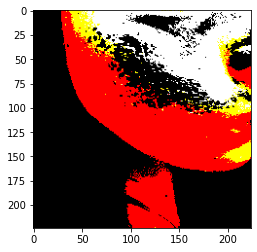

In [141]:
plt.imshow(img[0])
plt.show()

In [147]:
img = img_to_array(image)

    # keras works with batches of images, since we only have 1 image
    # here, we need to add an additional dimension to turn it into
    # shape [samples, size1, size2, channels]


In [149]:
img = np.expand_dims(img, axis=0)


In [130]:

images = np.vstack([img])

In [150]:
preds = model.predict(img)

In [162]:
#x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
#images = np.vstack([x])
classes = model.predict(images, batch_size=10)
classes = np.argmax(classes,axis=1)[0]
print("Predicted class is:",classes)

Predicted class is: [[0 1 0 ... 1 0 0]
 [1 1 0 ... 4 0 0]
 [1 0 0 ... 2 0 0]
 ...
 [1 0 0 ... 4 0 0]
 [1 1 0 ... 4 0 0]
 [4 0 0 ... 6 0 0]]


In [116]:
pred = np.argmax(preds, axis=1)

In [157]:
for cls in train_datagen.class_indices:
    print(cls+": "+classes[0][training_generator.class_indices[cls]])

AttributeError: 'ImageDataGenerator' object has no attribute 'class_indices'

In [140]:
img = preprocess_input(img)

In [ ]:
from keras.applications.resnet50 import decode_predictions


img = read_and_process_img(img_path)
img = preprocess_input(img)
preds = model.predict(img)
print('prediction shape: ', preds.shape)
print()

preds = decode_predictions(preds, top=5)
print(preds)
print()

# hopefully, we can say that the prediction does in fact makes sense
for i, (imagenetID, label, prob) in enumerate(preds[0]):
    print('{}. {}: {:.2f}%'.format(i + 1, label, prob * 100))
    
    
    
# predicting images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
classes = np.argmax(classes,axis=1)
print("Predicted class is:",classes)

In [87]:
preds = np.argmax(preds,axis=1)
print("Predicted class is:",preds)

Predicted class is: [[6 0 0 ... 6 0 0]]


In [ ]:



    imageYCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
    #detect human skin
    skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)      

    skinYCrCb = cv2.bitwise_and(image, image, mask = skinRegionYCrCb)

    
    image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#find contours
#contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Print the number of shapes found
#print("no. of shapes {0}".format(len(contours)))

thresh=cv2.threshold(image, 10, 255, cv2.THRESH_BINARY )[1] # threshold level is ~10
x, y, w, h = cv2.boundingRect(thresh)
crop = img[y:y+h, x:x+w]



img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.


def read_and_process_img(img_path, target_size=(224, 224)):
    """
    Reads in a single image, resize it to the specified target size
    and performs the same preprocessing on the image as the original
    pre-trained model.
    """
    image = image.load_img(img_path, target_size=target_size)
    imageYCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
    #detect human skin
    skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)      

    skinYCrCb = cv2.bitwise_and(image, image, mask = skinRegionYCrCb)

    
    image = cv2.cvtColor(skinYCrCb,cv2.COLOR_BGR2GRAY)
    img = image.img_to_array(img)

    # keras works with batches of images, since we only have 1 image
    # here, we need to add an additional dimension to turn it into
    # shape [samples, size1, size2, channels]
    img = np.expand_dims(img, axis=0)


    return img

    
from keras.applications.resnet50 import decode_predictions


img = read_and_process_img(img_path)
preds = model.predict(img)
print('prediction shape: ', preds.shape)
print()

preds = decode_predictions(preds, top=5)
print(preds)
print()

# hopefully, we can say that the prediction does in fact makes sense
for i, (imagenetID, label, prob) in enumerate(preds[0]):
    print('{}. {}: {:.2f}%'.format(i + 1, label, prob * 100))
    
    
    
# predicting images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
classes = np.argmax(classes,axis=1)
print("Predicted class is:",classes)

# OLD CODES# 
Global standardization
- and turned to np array

In [ ]:
########OLD CODES########
from skimage.io import imread
from skimage.transform import resize

path = '../data/images/newimages'

imgs = []

  # grab all images in the folder
files = glob.glob('../data/images/newimages/*.png')
 
for f in files:
    image = cv2.imread(f)
#    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #resize here?
    image = cv2.resize(image, (64,64))
 
    #turn to numpy array
    image = np.asarray(image)
    imgs.append(image)
    
imgs = np.stack(imgs)
print(imgs.shape)

In [ ]:
from skimage.io import imread
from skimage.transform import resize

path = '../data/images/newimages'

imgs = []

  # grab all images in the folder
files = glob.glob('../data/images/newimages/*.png')

for f in files:
    image = cv2.imread(f)
#    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #resize here?
    image = cv2.resize(image, (64,64))
 
    #turn to numpy array
    image = np.asarray(image)
    # convert from integers to floats
    image = image.astype('float32')
    # calculate global mean and standard deviation
    mean, std = image.mean(), image.std()
    print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
    # global standardization of pixels
    image = (image - mean) / std
    # confirm it had the desired effect
#    mean, std = image.mean(), image.std()
#    print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
    imgs.append(image)
    
imgs = np.stack(imgs)
print(imgs.shape)

In [ ]:
print(imgs.shape)
print(labels.shape)  

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into train and test subsets   ??? Don't need this step for this model?
X_train, X_test, y_train, y_test = train_test_split(
    imgs, labels, test_size=0.3, shuffle=True, random_state=100)

# check
print(X_train.shape)
print(X_test.shape)

In [ ]:
#create labels
normal = np.zeros((255, 1))
dry = np.ones((255,1))
oily = np.ones((255,1))*2
labels = np.r_[ normal, dry, oily]

In [4]:
#create labels
normal = np.zeros((295, 1))
dry = np.ones((285,1))
oily = np.ones((349,1))*2
labels = np.r_[ normal, dry, oily]

In [7]:
a_file = open("label.txt", "w")
for row in labels:
    np.savetxt(a_file, row)

a_file.close()

In [ ]:



dropout = [0,0.5,0.7] 

for d in dropout:
    for f in filterser_size:
        train model and evaluate on val set - validation performance